<a href="https://colab.research.google.com/github/suyashss/nn_test/blob/master/CNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir data

In [0]:
classes=['book','ladder','eyeglasses']

In [0]:
import urllib.request
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [5]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy


In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [0]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [0]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [9]:
print(x_train.shape)
print(x_train[0])

(9600, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  84.  35.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  29.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 217. 251.  76.   0.   0.   0.   0.   0.
   0.   0.   5. 161. 119. 253.  66.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  67. 255. 130.   0.   0.   0.   0.   0.
   0.   0.   5. 188. 255. 255. 186.  93.  39.  12.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  36. 255.  86.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  95. 255. 238. 255. 255. 255. 246. 223. 204. 204.
 204. 204. 204. 204. 204. 204. 209. 255. 131.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  49. 255.  73.  39.  86. 110. 131. 157. 170. 170.
 170. 170. 170. 170. 170. 170. 190. 255. 216.   0.   0.   0.   0.

eyeglasses


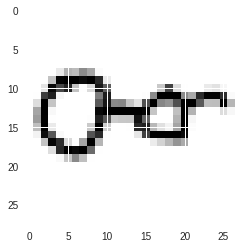

In [10]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [0]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
print(y_train.shape)

(9600, 3)


In [13]:
print(y_train[:10,:])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [21]:
model = keras.Sequential()
model.add(layers.Convolution2D(8, (3, 3), padding='same', activation= 'relu',input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(16, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 63        
Total para

In [22]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=10)

Train on 8640 samples, validate on 960 samples
Epoch 1/10
 - 1s - loss: 0.5454 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.3326 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/10
 - 0s - loss: 0.2400 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2565 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/10
 - 0s - loss: 0.1829 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2187 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/10
 - 0s - loss: 0.1553 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1942 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/10
 - 0s - loss: 0.1399 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1867 - val_top_k_categorical_accuracy: 1.0000
Epoch 6/10
 - 0s - loss: 0.1271 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1692 - val_top_k_categorical_accuracy: 1.0000
Epoch 7/10
 - 0s - loss: 0.1143 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1794 - val_top_k_categorical_accuracy: 1.0000
Epoch 8/10
 - 0s - loss: 0.1089 - top_k_categorica

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 100.00%


['ladder', 'eyeglasses']


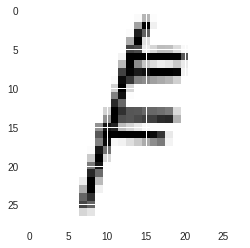

In [24]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:2]
latex = [class_names[x] for x in ind]
print(latex)